In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import json
import sys
import os
import matplotlib
#matplotlib.use('Agg') 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns
import pdb
#import ipdb
import h5py
import importlib
import pickle
import math

# Add root folder to sys path
sys.path.append("../")

from load_expert_traj import recursively_save_dict_contents_to_group

# %pylab inline
# inline doesn't give interactive plots
%matplotlib inline 
# %matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'Blues'

sns.set()

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Import own modules
# Need to use importlib since module starts with a numerical value.

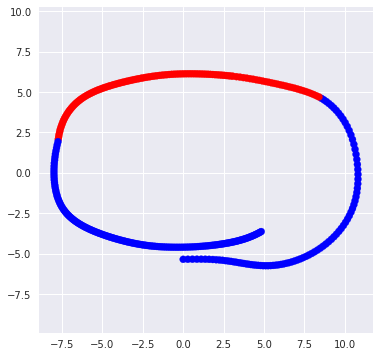

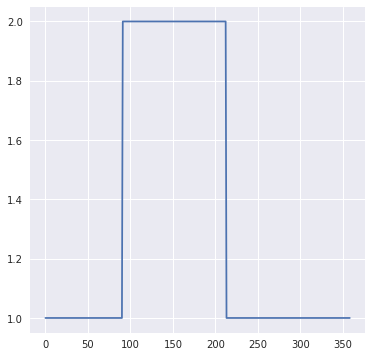

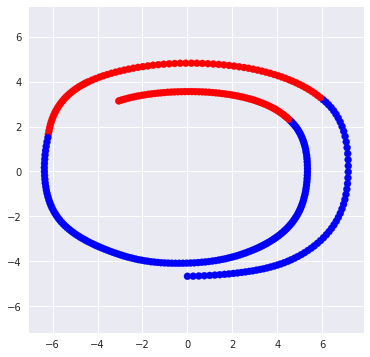

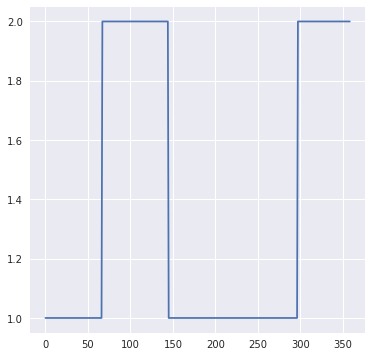

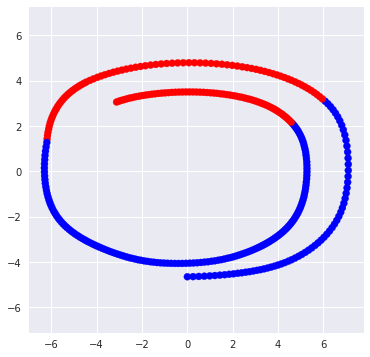

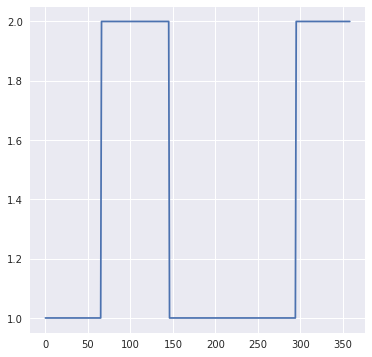

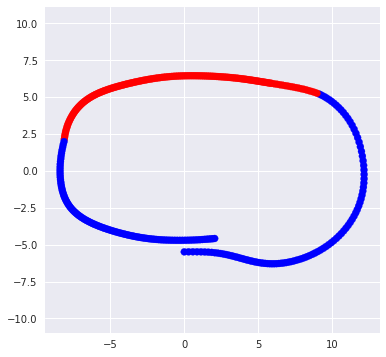

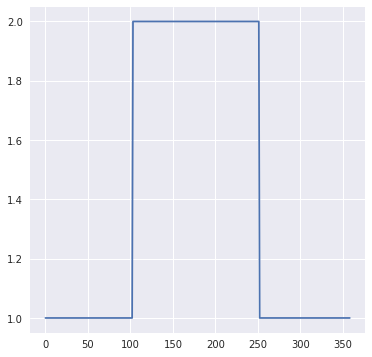

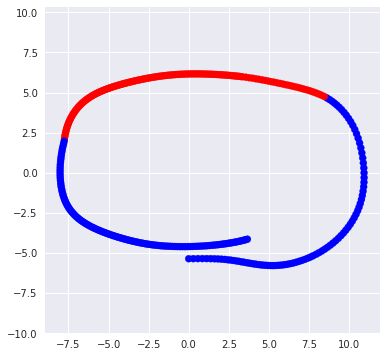

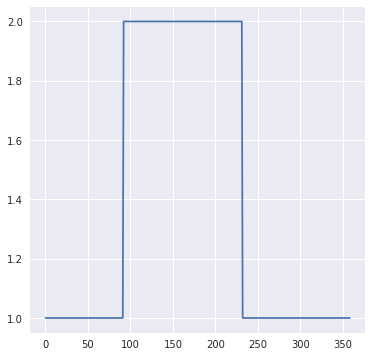

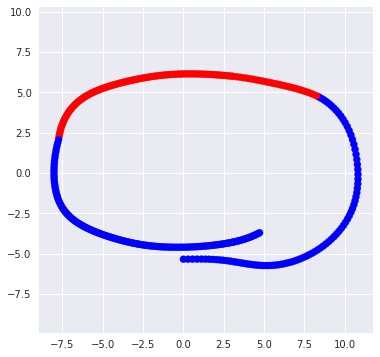

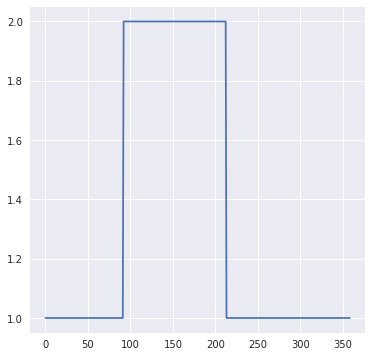

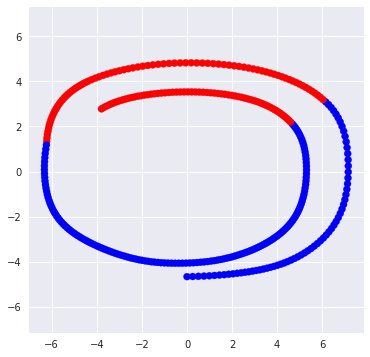

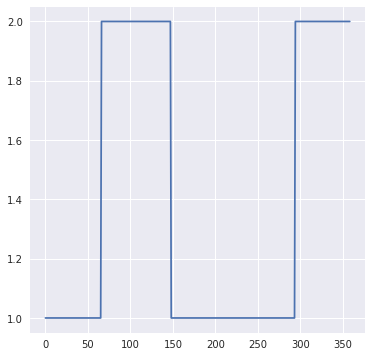

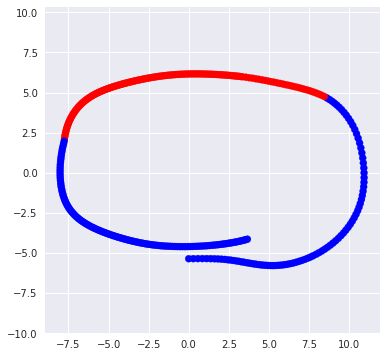

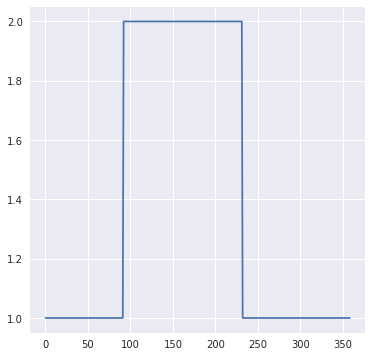

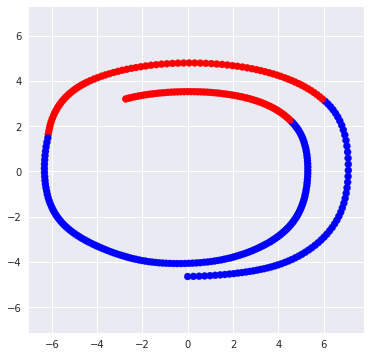

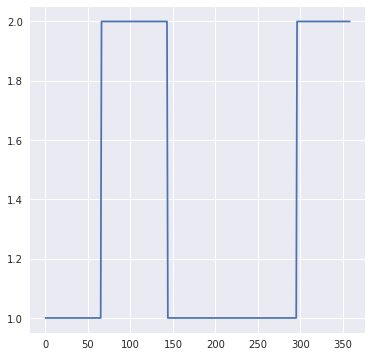

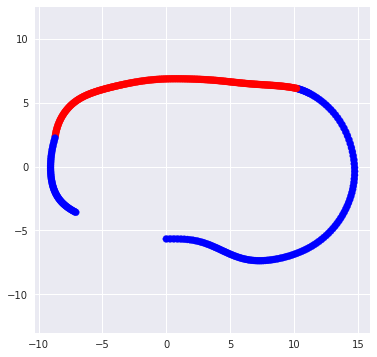

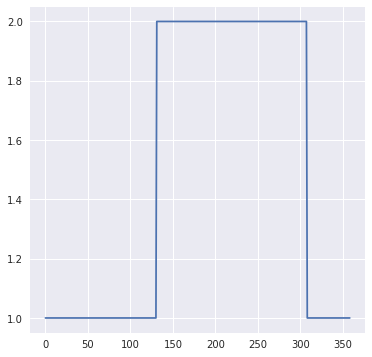

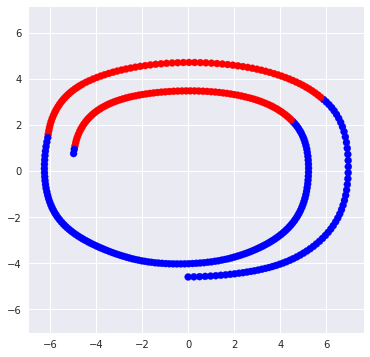

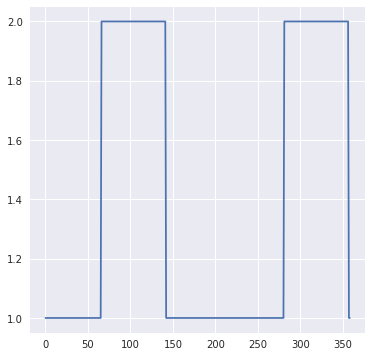

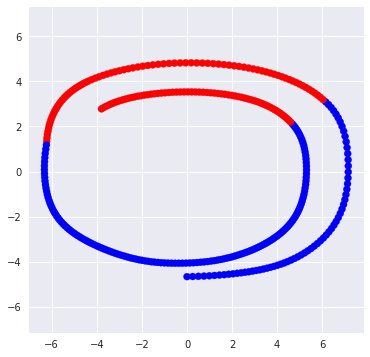

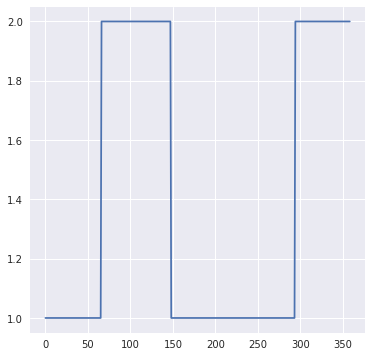

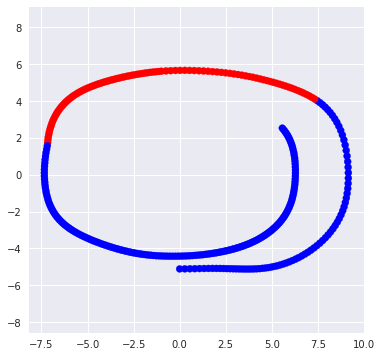

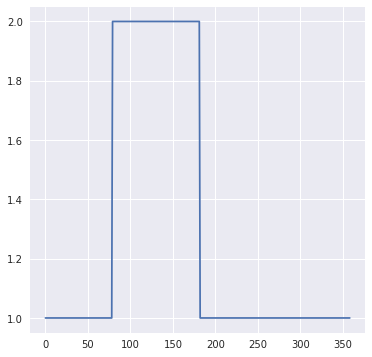

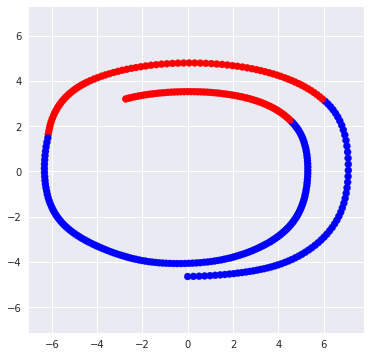

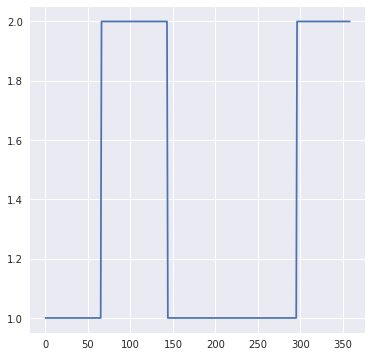

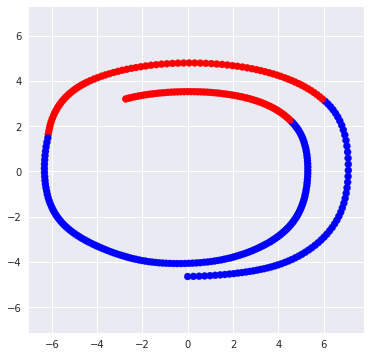

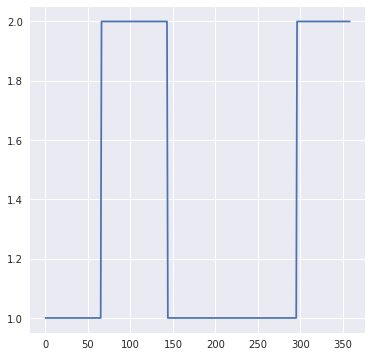

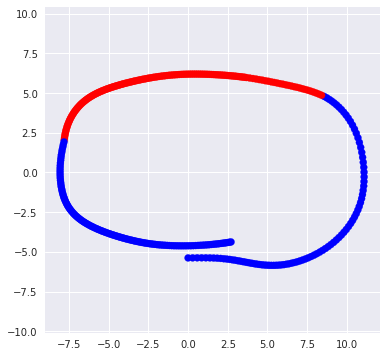

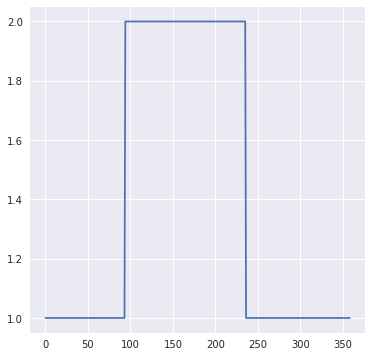

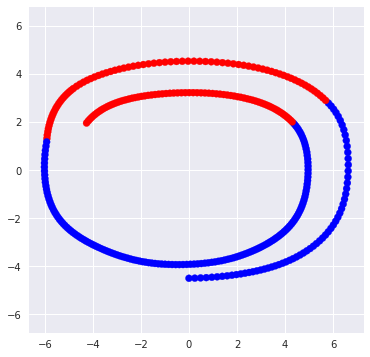

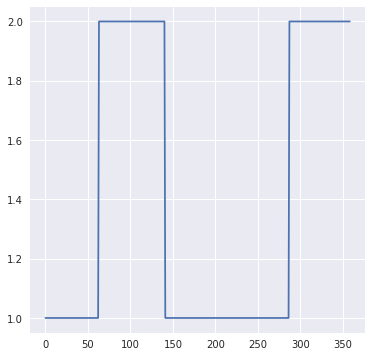

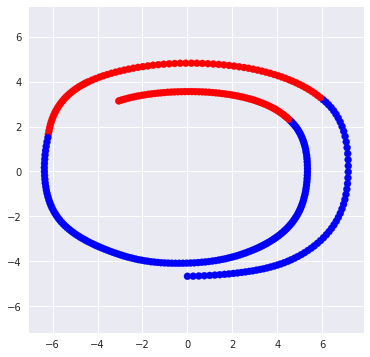

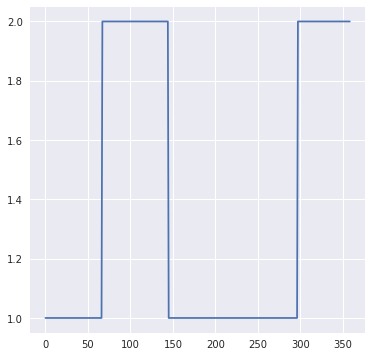

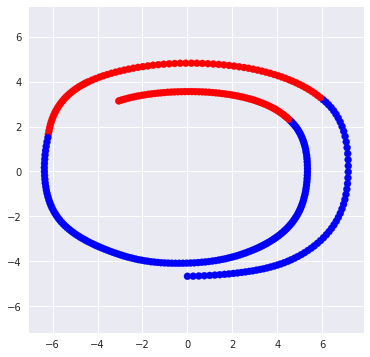

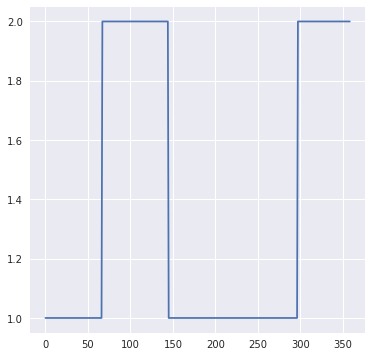

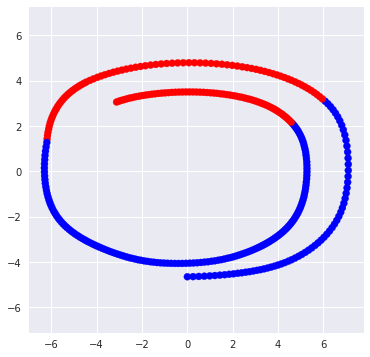

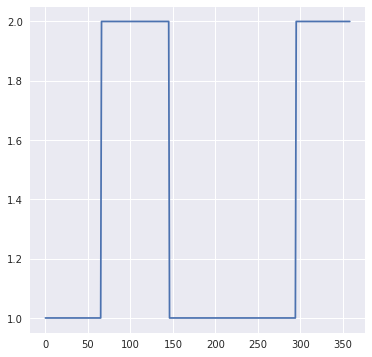

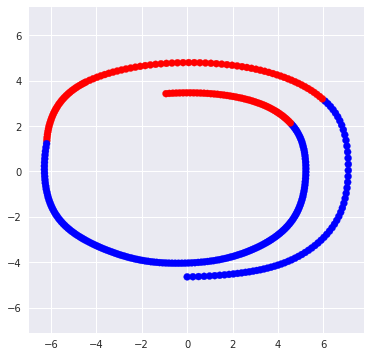

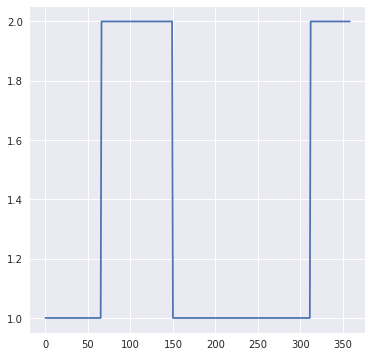

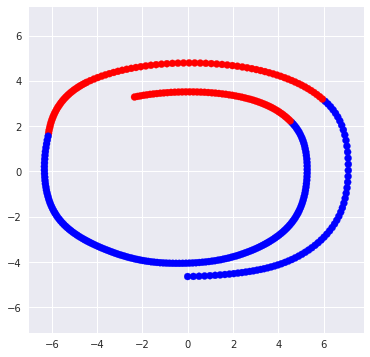

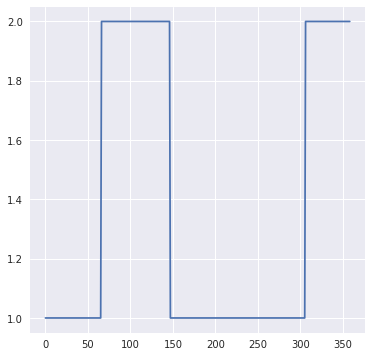

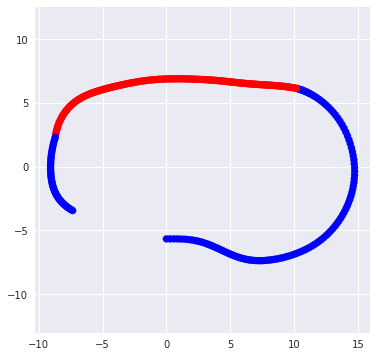

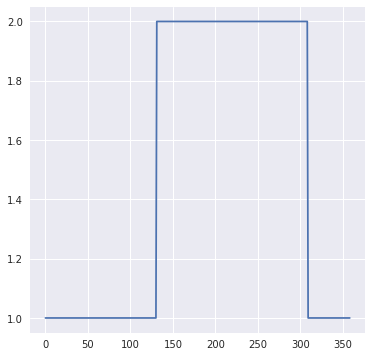

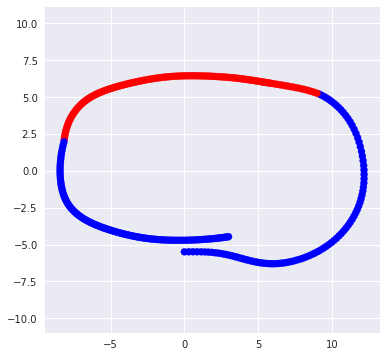

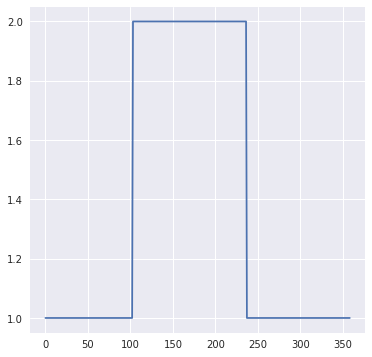

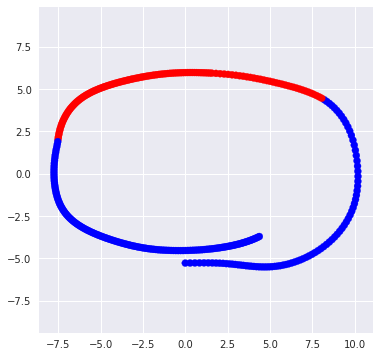

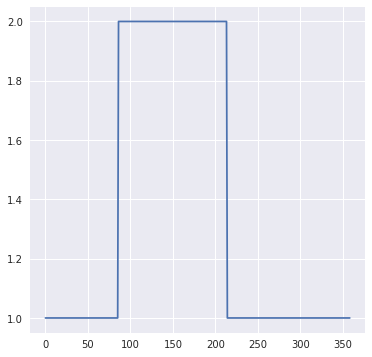

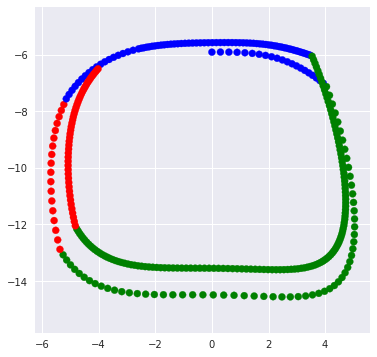

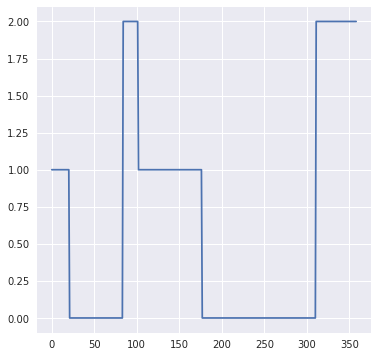

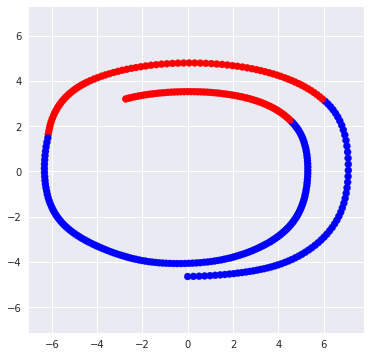

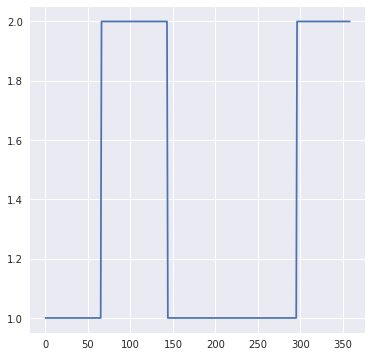

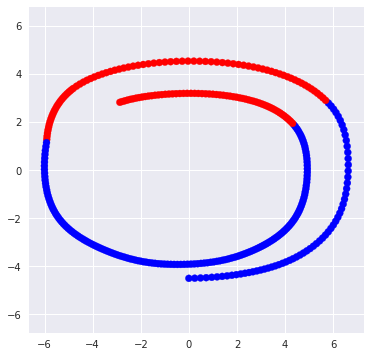

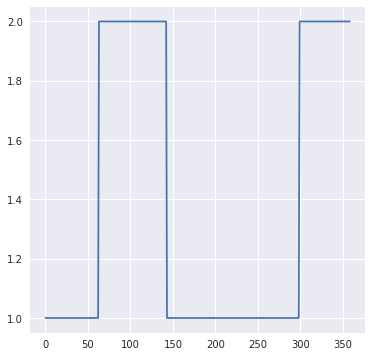

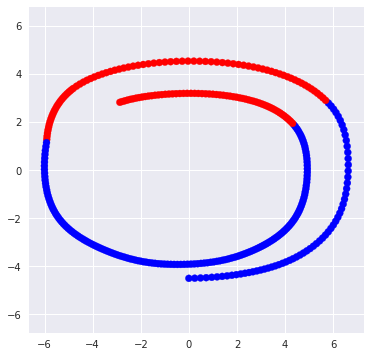

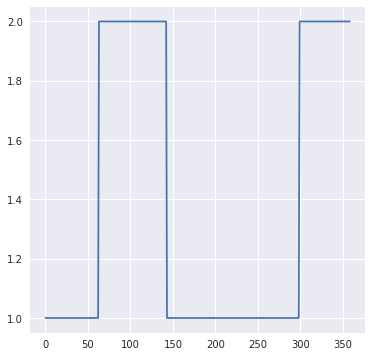

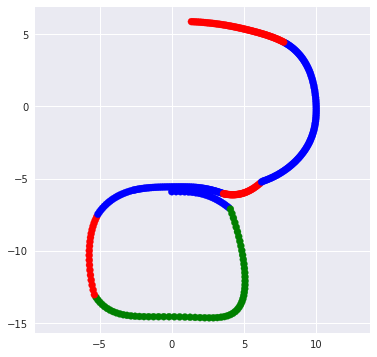

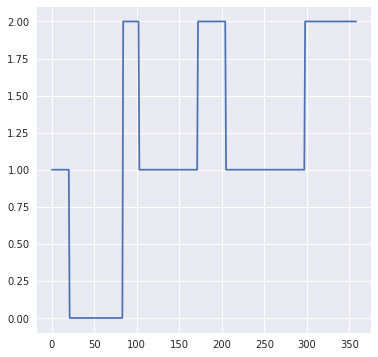

In [2]:
def softmax(x):
    if len(x.shape) == 2:
        new_x = x - np.max(x,axis=1)[:, np.newaxis]
        denom = np.sum(np.exp(new_x), axis = 1)[:, np.newaxis]
        return np.exp(new_x)/denom
    elif len(x.shape) == 1:
        new_x = x - np.max(x)
        denom = np.sum(np.exp(new_x))
        return np.exp(new_x) / denom
    else:
        raise ValueError("incorrect softmax input")
                      
def plot_circle(x_list, y_list, colors, title=''):
    plt.scatter(x_list, y_list, color=colors) 
    plt.axis('equal')    
    plt.title(title)
    plt.show()

    
# results_pkl_path = '../results/circle/vae/epoch_400_traj_40_meta_2_r_0.011_Aug_6_5_50_PM/results_cp_400.pkl'
results_pkl_path = '../results/vae/tmp/meta_2_traj_40_normalized_action/results_cp_1000.pkl'
with open(results_pkl_path, 'rb') as results_f:
    results_data = pickle.load(results_f)

num_trajs = len(results_data['pred_traj_state'])
context_colors = ['g', 'b', 'r', 'm', 'y', 'c', 'k', 'w']
#markers = ['.', 'v', 'o', 's']

x_pos_list, y_pos_list, c_list = [], [], []
for i in range(num_trajs):
    traj_state = results_data['pred_traj_state'][i]
    traj_action = results_data['pred_traj_action'][i]
    traj_context = results_data['pred_context'][i]
    traj_context = np.reshape(traj_context, (traj_state.shape[0], -1))
    traj_context_label = np.argmax(traj_context, axis=1)
    traj_context_color = [context_colors[i] for i in traj_context_label]
    plot_circle(traj_state[:, 0].tolist(), traj_state[:, 1].tolist(),
                traj_context_color)
    plt.plot(traj_context_label)
    plt.show()